# GitHub Repo Search

[Top](#GitHub-Repo-Search)

- [Acquire](#Acquire)
- [Explore Test Data](#Explore-Test-Data)

In [1]:
###############################################################################
### pthon imports                                                           ###
###############################################################################

from os import path
from requests import get
from bs4 import BeautifulSoup
import os
import pandas as pd
import re

In [2]:
###############################################################################
### local imports                                                           ###
###############################################################################

import zachquire as zaq
import acquire as acq


## Acquire

[Top](#GitHub-Repo-Search)

In [3]:
def find_file(
    file_name='path/file.txt',
    cache=False,
    cache_age=None
    ):

    if cache==False:
        return None
    
    return path.exists(file_name)

In [4]:
def get_soup(
    url='https://github.com/search?o=desc&p=1&q=advent+of+code&s=stars&type=Repositories',
    headers={'User-Agent': 'Nothing suspicious'},
    file_name='soupfiles/gitsearch.txt',
    cache=False,
    cache_age=None,
    slurper='*'
):
    '''
    
    '''
    # if we already have the data, read it locally
    file_found = find_file(file_name=file_name, cache=cache, cache_age=cache_age)
    if file_found:
        with open(file_name) as f:
            return True, BeautifulSoup(f.read())

    # otherwise go fetch the data
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.text)
    slurps = soup.select(slurper)
    if len(slurps) == 0:
        print('***** NO DATA RETURNED *****')
        return False, soup
    
    # save it for next time
    with open(file_name, 'w') as f:
        f.write(str(slurps[0]))
        if len(slurps)>1:
            for slurp in slurps[1:]:
#                 print(str(slurp))
                f.write('\n' + str(slurp))
        
    with open(file_name) as f:    
        soup = BeautifulSoup(f.read())
#     pd.to_csv(slurps, header=None, index=False)

    return True, soup

In [5]:
slurped, soup = get_soup(
    url='https://github.com/search?o=desc&p=2&q=advent+of+code&s=stars&type=Repositories',
    cache=True,
    slurper='.repo-list-item a',
    file_name='soupfiles/gitsearch.txt'
)

In [6]:
def soup_loop_gitsearch(
    df,
    page_beg=1,
    page_end=20,
    url='https://github.com/',
    adder_prepage='search?o=desc&',
    adder_postpage='&q=advent+of+code&s=stars&type=Repositories',
    headers={'User-Agent': 'Nothing suspicious'},
    directory='soupfiles/',
    file_name='gitsearch',
    file_suffix='.txt',
    cache=False,
    slurper='.repo-list-item a',
):
    for page in range(page_beg, page_end+1):
        use_page = str(page)
        use_url = f'{url}{adder_prepage}p={use_page}{adder_postpage}'
        use_file = f'{directory}{file_name}{use_page:>02s}{file_suffix}'
        print(f'use_page: {use_page:>2s}')
        print(f'use_url: {use_url}')
        print(f'use_file: {use_file}')
        slurped, soup = get_soup(
            url = use_url,
            file_name = use_file,
            cache = cache,
            slurper = slurper,
        )
        log_file = use_file if slurped else None
        loopdict = {
            'soup': [soup], 
            'page': [page], 
            'url': [use_url], 
            'file_name': [log_file]
        }
        df = df.append(pd.DataFrame.from_dict(loopdict), ignore_index=True)
    return df
        

In [7]:
def make_soup_gitsearch(
    page_beg=1, 
    page_end=20,
    headers={'User-Agent': 'Nothing suspicious'},
    adder_prepage='search?o=desc&',
    adder_postpage='&q=advent+of+code&s=stars&type=Repositories',
    directory='soupfiles/',
    file_name='gitsearch',
    file_suffix='.txt',
    cache=True,
    slurper='.repo-list-item a',
):
    soup_df = pd.DataFrame([], columns=['soup','page','url','file_name'])
    soup_df = soup_loop_gitsearch(
        soup_df, 
        cache=True, 
        headers=headers,
        page_beg=page_beg, 
        page_end=page_end,
        adder_prepage=adder_prepage,
        adder_postpage=adder_postpage,
        file_name=file_name,
        file_suffix=file_suffix,
        slurper=slurper
    )
    return soup_df

In [8]:
soup_df = acq.make_soup_gitsearch()
soup_df

/Users/kevineliasen/codeup-data-science/P06nlp/acquire.py:45: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 45 of the file /Users/kevineliasen/codeup-data-science/P06nlp/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  return True, BeautifulSoup(f.read())


,soup,page,url,file_name
0,"<html><body><a class=""v-align-middle"" data-hyd...",1,https://github.com/search?o=desc&p=1&q=advent+...,soupfiles/gitsearch01.txt
1,"<html><body><a class=""v-align-middle"" data-hyd...",2,https://github.com/search?o=desc&p=2&q=advent+...,soupfiles/gitsearch02.txt
2,"<html><body><a class=""v-align-middle"" data-hyd...",3,https://github.com/search?o=desc&p=3&q=advent+...,soupfiles/gitsearch03.txt
3,"<html><body><a class=""v-align-middle"" data-hyd...",4,https://github.com/search?o=desc&p=4&q=advent+...,soupfiles/gitsearch04.txt
4,"<html><body><a class=""v-align-middle"" data-hyd...",5,https://github.com/search?o=desc&p=5&q=advent+...,soupfiles/gitsearch05.txt
5,"<html><body><a class=""v-align-middle"" data-hyd...",6,https://github.com/search?o=desc&p=6&q=advent+...,soupfiles/gitsearch06.txt
6,"<html><body><a class=""v-align-middle"" data-hyd...",7,https://github.com/search?o=desc&p=7&q=advent+...,soupfiles/gitsearch07.txt
7,"<html><body><a class=""v-align-middle"" data-hyd...",8,https://github.com/search?o=desc&p=8&q=advent+...,soupfiles/gitsearch08.txt
8,"<html><body><a class=""v-align-middle"" data-hyd...",9,https://github.com/search?o=desc&p=9&q=advent+...,soupfiles/gitsearch09.txt
9,"<html><body><a class=""v-align-middle"" data-hyd...",10,https://github.com/search?o=desc&p=10&q=advent...,soupfiles/gitsearch10.txt


In [9]:
print(soup_df.soup[19])

<html><body><a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number":20,"per_page":10,"query":"advent of code","result_position":1,"click_id":47785268,"result":{"id":47785268,"global_relay_id":"MDEwOlJlcG9zaXRvcnk0Nzc4NTI2OA==","model_name":"Repository","url":"https://github.com/kodsnack/advent_of_code_2015"},"client_id":null,"originating_request_id":"C7F4:2C7D:5EBEA74:9ED209C:5DF038B4","originating_url":"https://github.com/search?o=desc&amp;p=20&amp;q=advent+of+code&amp;s=stars&amp;type=Repositories","referrer":null,"user_id":null}}' data-hydro-click-hmac="9da75b1cde3ca6cefec42158aacd558eb5da021c451d01da62dd3d92bfe514b2" href="/kodsnack/advent_of_code_2015">kodsnack/<em>advent</em>_<em>of</em>_<em>code</em>_2015</a>
<a href="http://adventofcode.com" rel="nofollow">http://adventofcode.com</a>
<a class="muted-link" href="/kodsnack/advent_of_code_2015/stargazers">
<svg aria-label="star" class="octicon octicon-star" height="16" role="img" ve

In [10]:
re_url = re.compile(r'"url"\:"(.+?)"')
urllist = re_url.findall(str(soup_df.soup[0]))

urllist

['https://github.com/Bogdanp/awesome-advent-of-code',
 'https://github.com/BurntSushi/advent-of-code',
 'https://github.com/Lysxia/advent-of-coq-2018',
 'https://github.com/fogleman/AdventOfCode2018',
 'https://github.com/mstksg/advent-of-code-2018',
 'https://github.com/Voltara/advent2018-fast',
 'https://github.com/wimglenn/advent-of-code-data',
 'https://github.com/ChrisPenner/Advent-Of-Code-Polyglot',
 'https://github.com/jaksi/advent-of-other-peoples-code',
 'https://github.com/molyswu/hand_detection']

In [11]:
def get_repo_urls_from_gitsearch(df, column='soup', reg_text=r'"url"\:"(.+?)"'):
    git_urls = []
    re_url = re.compile(reg_text)
    for soup in soup_df.soup:
        git_urls.extend(re_url.findall(str(soup)))
    return list(set(git_urls))

In [12]:
url_list = acq.get_repo_urls_from_gitsearch(soup_df)

In [13]:
len(url_list)

197

In [14]:
remove_repos = [
    'Bogdanp/awesome-advent-of-code',
    'scy/advent-of-code',
    'agrison/advent-of-code-2019/',
    'ephemient/aoc2019/tree/hs',
    'notviri/aoc2019',
    'visini/aoc2019',
]

In [15]:
# souprepo = get_soup(
#     url = 'https://github.com/mfikes/advent-of-code',
#     file_name = 'soupfiles/mfikes_advent-of-code.html',
#     slurper='html',
#     cache = False
# )


In [16]:
# souprepo = get_soup(
#     url = 'https://github.com/Diggsey/aoc2018',
#     file_name = 'soupfiles/diggsey_aoc2018.html',
#     slurper='html',
#     cache = False
# )

In [17]:
# souprepo = get_soup(
#     url = 'https://github.com/mhanberg/advent-of-code-elixir-starter',
#     file_name = 'soupfiles/mhanberg_advent-of-code-elixir-starter.html',
#     slurper='html',
#     cache = False
# )

In [18]:
# Library imports for sending request, parsing HTML, and pandas
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
# Example list of URLs from GitHub
urls = [
    "https://github.com/mfikes/advent-of-code",
    "https://github.com/ryanorsinger/intro-to-machine-learning-workshop",
    'https://github.com/Diggsey/aoc2018',
    "https://github.com/kjeliasen/AdventOfCode",
    'https://github.com/mhanberg/advent-of-code-elixir-starter'
]
output = []
for url in urls:
    request = get(url)
    soup = BeautifulSoup(request.text)
    title = url.split("/")[-1]
    author = url.split("/")[-2]
    language_info = soup.select_one(".repository-lang-stats-numbers")
    languages = [language.get_text() for language in language_info.select(".lang")]
    percentages = [percentage.get_text() for percentage in language_info.select(".percent")]
    readme = soup.select_one("#readme article")
    repo_data = {}
    repo_data["author"] = author
    repo_data["title"] = title
    repo_data["readme"] = readme
    repo_data["languages"] = languages
    repo_data["language_percentages"] = percentages
    output.append(repo_data)
# df = pd.DataFrame(output)
# df.to_csv("soupfiles/all_repo_data.csv")

In [19]:
# df

In [20]:
def get_repos_from_url_list(url_list, reg_text=r'https\://github.com/(.+?)$'):
    re_repo = re.compile(reg_text)
    repo_list = []
    repo_check = [re_repo.findall(url)[0] for url in url_list]
    repo_list.extend(repo_check)
    repo_list.sort()
    return repo_list

In [21]:
repo_list = acq.get_repos_from_url_list(url_list)
repo_list

['1Computer1/advent',
 'AlexAegis/advent-of-code',
 'AlexeSimon/adventofcode',
 'BartMassey/advent-of-code-2015',
 'BartMassey/advent-of-code-2016',
 'BartoszMilewski/AdventOfCode18',
 'BartoszMilewski/AoC2019',
 'BartoszMilewski/AofC2017',
 'BenoitZugmeyer/RustyAdventOfCode',
 'Bogdanp/awesome-advent-of-code',
 'BurntSushi/advent-of-code',
 'CameronAavik/AdventOfCode',
 'ChrisPenner/Advent-Of-Code-Polyglot',
 'ChrisPenner/advent-of-code-haskell',
 'CloudCoders/AdventOfCode2017',
 'Dementophobia/advent-of-code-2019',
 'Diggsey/aoc2018',
 'FlorianCassayre/AdventOfCode-2017',
 'FlorianCassayre/AdventOfCode-2018',
 'Harleqin/advent-of-code-2017',
 'IdrisTheDragon/AdventOfCode2018',
 'JEG2/advent_of_code_2016',
 'JEG2/advent_of_code_2018',
 'Janiczek/advent-of-code',
 'KrzaQ/AdventOfCode2015',
 'KrzaQ/AdventOfCode2017',
 'KrzaQ/AdventOfCode2018',
 'KrzaQ/AdventOfCode2019',
 'Larkenx/AdventOfCode2018',
 'Lokeh/advent-2017',
 'Lokeh/advent-2019',
 'Lysxia/advent-of-coq-2018',
 'M0nica/advent

In [22]:
def get_subrepos_from_readmes(
    repos=['Bogdanp/awesome-advent-of-code'],
    filepath="datafiles/xtrafile.json",
    reg_text=r'\(https\://github.com/(.+?)\)',
):
    zaq.scrape_github_data(repos=repos, filepath=filepath)
    git_df = pd.read_json(filepath).rename(columns={'repo':'repo_full'})
    git_readme = git_df.readme_contents[0]
    re_xtra = re.compile(reg_text)
    readme_urls = re_xtra.findall(git_readme)
    subrepos = [i.split('/')[0] + '/' + i.split('/')[1] for i in readme_urls]
    subrepos.sort()
    return subrepos

In [23]:
xtra_repo_list = ['Bogdanp/awesome-advent-of-code']
xtra_repos = acq.get_subrepos_from_readmes(repos=xtra_repo_list)
xtra_repos

Bogdanp/awesome-advent-of-code
https://raw.githubusercontent.com/Bogdanp/awesome-advent-of-code/master/README.md


['0legg/adventofcode',
 '0x8b/advent-of-code-2019',
 'Akumatic/Advent-of-Code',
 'AlexAegis/advent-of-code',
 'AlexAegis/advent-of-code',
 'AlexeSimon/adventofcode',
 'AmauryCarrade/AdventOfCode2019',
 'AnkurSheel/AdventOfCode2019',
 'Awjin/advent-of-code',
 'BogDAAAMN/advent-of-code',
 'CameronAavik/AdventOfCode',
 'Cattiva/adventofcode',
 'ChrisPritchard/AdventOfCode',
 'Crucerio/adventofcode',
 'DarthGandalf/advent-of-code',
 'Dementophobia/advent-of-code-2019',
 'EdwinTh/AoC_2019',
 'Firebain/adventofcode',
 'FlorianCassayre/AdventOfCode-2019',
 'GigaNova/advent-of-code-2019',
 'GreenLightning/advent-of-code-downloader',
 'GreenLightning/aoc19',
 'IFinners/advent-of-code',
 'JasonCannon/advent-of-code-2019',
 'Jedi-Fullstack-Avengers/AdventOfCode',
 'JesperDramsch/advent-of-code',
 'Kazhuu/advent-of-code-2019',
 'Keirua/adventofcode-rb',
 'Kurocon/AdventOfCode2019',
 'Lartu/adventOfCode2019',
 'Levivig/AdventOfCode2019',
 'MaxArt2501/advent-of-code-2019',
 'Miccowhy/adventofcode201

In [24]:
def merge_repo_list(repos=[], xtra_repos=[], remove_repos=[]):
    repos.extend(xtra_repos)
    repos = list(set(repos))
    for repo in remove_repos:
        if repo in repos:
            repos.remove(repo)
    repos.sort(key=str.lower)
    return repos

In [25]:
repo_list = acq.merge_repo_list(repos=repo_list, xtra_repos=xtra_repos, remove_repos=remove_repos)

print(len(repo_list))
display(repo_list[:10])

356


['0legg/adventofcode',
 '0x8b/advent-of-code-2019',
 '1Computer1/advent',
 'a-red-christmas/aoc2019-ae',
 'adam-gruer/aoc2019',
 'adriennetacke/advent-of-code-2018',
 'adriennetacke/advent-of-code-2019',
 'adventofcode/2015solutions',
 'afonsojramos/advent-of-code-2018',
 'agrison/advent-of-code-2019']

In [26]:
# acq.scrape_github_data(repos=repo_list, filepath="datafiles/data.json")

In [27]:
def scrape_github_data(repos=[], filepath="datafiles/data.json"):
    zaq.scrape_github_data(repos=repos, filepath=filepath)
    return True

In [28]:
def process_scraped_repos(filepath="datafiles/data.json"):
    git_json = pd.read_json(filepath).rename(columns={'repo':'repo_full'})
    git_json=git_json[git_json.repo_full.isin(remove_repos)==False].dropna().reset_index().drop(columns='index')
    git_json['author'] = git_json.repo_full.apply(lambda x: x.split('/')[0])
    git_json['repo'] = git_json.repo_full.apply(lambda x: x.split('/')[-1])
    git_json['readme'] = git_json.readme_contents.str.lower()
    git_json['readme'] = [git_json.readme[i].replace(git_json.author[i].lower(), 'username') for i in range(0,len(git_json))]
    git_json['readme'] = [git_json.readme[i].replace(git_json.repo[i].lower(), 'reponame') for i in range(0,len(git_json))]

    return git_json

In [29]:
git_df = acq.process_scraped_repos(filepath="datafiles/scrape.json", remove_repos=remove_repos)
display(git_df.head())
git_df.info()

,language,language_all,readme_contents,repo_full,author,repo,readme,readme_len
0,Python,{'Python': 43467},# 0x8b's [Advent of Code 2019](https://advento...,0x8b/advent-of-code-2019,0x8b,advent-of-code-2019,# username's [advent of code 2019](https://adv...,1767
1,Haskell,"{'Haskell': 36753, 'Python': 503}",# Advent of Code Solutions\n\nI'm probably not...,1Computer1/advent,1Computer1,advent,# reponame of code solutions\n\ni'm probably n...,623
2,JavaScript,{'JavaScript': 23065},# advent-of-code-2018\n[![Build Status](https:...,adriennetacke/advent-of-code-2018,adriennetacke,advent-of-code-2018,# reponame\n[![build status](https://travis-ci...,3243
3,JavaScript,{'JavaScript': 41567},# advent-of-code-2019\nAdvent of Code 2019 🎄 J...,adriennetacke/advent-of-code-2019,adriennetacke,advent-of-code-2019,# reponame\nadvent of code 2019 🎄 javascript s...,2484
4,C,"{'C': 104592, 'Java': 70741, 'Rust': 70646, 'H...",### Advent Of Code solutions\n\nGot a solution...,adventofcode/2015solutions,adventofcode,2015solutions,### advent of code solutions\n\ngot a solution...,792


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 8 columns):
language           304 non-null object
language_all       304 non-null object
readme_contents    304 non-null object
repo_full          304 non-null object
author             304 non-null object
repo               304 non-null object
readme             304 non-null object
readme_len         304 non-null int64
dtypes: int64(1), object(7)
memory usage: 19.1+ KB


In [30]:
git_df.repo.value_counts().head()

advent-of-code         35
advent-of-code-2019    23
adventofcode           17
AdventOfCode           17
advent-of-code-2018    11
Name: repo, dtype: int64

In [31]:
# mask = ['namen' in str(x.lower()) for x in git_df.readme_contents]
# idx = git_df[mask].index
# for rc in git_df.repo_full.loc[idx]:
#     print(rc)
# for rc in git_df.readme_contents.loc[idx]:
#     print(rc)

In [32]:
# repo = 'kjeliasen/AdventOfCode'
# repo = 'Harleqin/advent-of-code-2017'
# repo = 'Bogdanp/awesome-advent-of-code'
# repo = 'agrison/advent-of-code-2019/'
# reporesp = zaq.github_api_request(f"https://api.github.com/repos/{repo}")


In [33]:
# reporesp.json()

In [34]:
git_df.language.value_counts()

Python              45
JavaScript          36
Haskell             29
Rust                21
Go                  18
Clojure             16
Java                15
Kotlin              12
Ruby                10
C#                  10
Elixir              10
Scala                8
C++                  8
R                    7
Jupyter Notebook     5
TypeScript           5
OCaml                5
PHP                  4
C                    3
Swift                3
F#                   2
Scheme               2
Crystal              2
Pony                 2
PowerShell           2
Elm                  2
Julia                2
Perl                 2
HTML                 2
Nim                  1
Haxe                 1
APL                  1
Coq                  1
Racket               1
Smalltalk            1
Mathematica          1
PureScript           1
Eiffel               1
Reason               1
Shell                1
Dart                 1
D                    1
TSQL                 1
Erlang     

In [35]:
# git_df['readme_len'] = git_df.readme.apply(len)
# git_json.drop(columns='readme_contents')
# print(f'has author: {git_json.name_in_readme.sum()}\nhas repo{git_json.repo_in_readme.sum()}')
display(git_df.head())
display(git_df.info())

,language,language_all,readme_contents,repo_full,author,repo,readme,readme_len
0,Python,{'Python': 43467},# 0x8b's [Advent of Code 2019](https://advento...,0x8b/advent-of-code-2019,0x8b,advent-of-code-2019,# username's [advent of code 2019](https://adv...,1767
1,Haskell,"{'Haskell': 36753, 'Python': 503}",# Advent of Code Solutions\n\nI'm probably not...,1Computer1/advent,1Computer1,advent,# reponame of code solutions\n\ni'm probably n...,623
2,JavaScript,{'JavaScript': 23065},# advent-of-code-2018\n[![Build Status](https:...,adriennetacke/advent-of-code-2018,adriennetacke,advent-of-code-2018,# reponame\n[![build status](https://travis-ci...,3243
3,JavaScript,{'JavaScript': 41567},# advent-of-code-2019\nAdvent of Code 2019 🎄 J...,adriennetacke/advent-of-code-2019,adriennetacke,advent-of-code-2019,# reponame\nadvent of code 2019 🎄 javascript s...,2484
4,C,"{'C': 104592, 'Java': 70741, 'Rust': 70646, 'H...",### Advent Of Code solutions\n\nGot a solution...,adventofcode/2015solutions,adventofcode,2015solutions,### advent of code solutions\n\ngot a solution...,792


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 8 columns):
language           304 non-null object
language_all       304 non-null object
readme_contents    304 non-null object
repo_full          304 non-null object
author             304 non-null object
repo               304 non-null object
readme             304 non-null object
readme_len         304 non-null int64
dtypes: int64(1), object(7)
memory usage: 19.1+ KB


None

In [36]:
def output_processed_repos(git_df, output_file='datafiles/outdata.json'):
    git_df.drop(columns=['readme_contents']).to_json(output_file, orient = 'columns')
    json_chk = pd.read_json(output_file)
    return json_chk

In [37]:
output_file = 'datafiles/outdata.json'
json_chk = acq.output_processed_repos(git_df=git_df, output_file=output_file) #.reset_index()
# json_chk.index = json_chk.index.astype('int64')
# json_chk.set_index('index', inplace=True)
# json_chk.sort_index(inplace=True)

In [38]:

display(json_chk.head(10))
display(json_chk.info())

,language,language_all,repo_full,author,repo,readme,readme_len
index,,,,,,,
0,Python,{'Python': 43467},0x8b/advent-of-code-2019,0x8b,advent-of-code-2019,# username's [advent of code 2019](https://adv...,1767
1,Haskell,"{'Haskell': 36753, 'Python': 503}",1Computer1/advent,1Computer1,advent,# reponame of code solutions\n\ni'm probably n...,623
2,JavaScript,{'JavaScript': 23065},adriennetacke/advent-of-code-2018,adriennetacke,advent-of-code-2018,# reponame\n[![build status](https://travis-ci...,3243
3,JavaScript,{'JavaScript': 41567},adriennetacke/advent-of-code-2019,adriennetacke,advent-of-code-2019,# reponame\nadvent of code 2019 🎄 javascript s...,2484
4,C,"{'C': 104592, 'Java': 70741, 'Rust': 70646, 'H...",adventofcode/2015solutions,adventofcode,2015solutions,### advent of code solutions\n\ngot a solution...,792
5,Go,{'Go': 21844},afonsojramos/advent-of-code-2018,afonsojramos,advent-of-code-2018,# reponame\n### 🎄 my submissions for this year...,1133
6,Java,"{'Java': 11088, 'Clojure': 7316}",agrison/advent-of-code-2019,agrison,advent-of-code-2019,# reponame,10
7,R,{'R': 28676},akulumbeg/adventofcode,akulumbeg,adventofcode,"# advent of code \nmy take on advent of code, ...",166
8,Python,{'Python': 56291},Akumatic/Advent-of-Code,Akumatic,Advent-of-Code,# advent of code\n\nthis repository contains m...,402


<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 303
Data columns (total 7 columns):
language        304 non-null object
language_all    304 non-null object
repo_full       304 non-null object
author          304 non-null object
repo            304 non-null object
readme          304 non-null object
readme_len      304 non-null int64
dtypes: int64(1), object(6)
memory usage: 19.0+ KB


None

In [39]:
json_chk.language.value_counts()

Python              45
JavaScript          36
Haskell             29
Rust                21
Go                  18
Clojure             16
Java                15
Kotlin              12
Ruby                10
C#                  10
Elixir              10
Scala                8
C++                  8
R                    7
Jupyter Notebook     5
TypeScript           5
OCaml                5
PHP                  4
C                    3
Swift                3
F#                   2
Scheme               2
Crystal              2
Pony                 2
PowerShell           2
Elm                  2
Julia                2
Perl                 2
HTML                 2
Nim                  1
Haxe                 1
APL                  1
Coq                  1
Racket               1
Smalltalk            1
Mathematica          1
PureScript           1
Eiffel               1
Reason               1
Shell                1
Dart                 1
D                    1
TSQL                 1
Erlang     

[Test_link](https://render.githubusercontent.com/view/ipynb?commit=6a4959e0802376c132c3a23979f0c289ba5953d1&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f4b657669642d446176696e2f6e6c705f70726f6a6563742f366134393539653038303233373663313332633361323339373966306332383962613539353364312f66696e616c2e6970796e62&nwo=Kevid-Davin%2Fnlp_project&path=final.ipynb&repository_id=227154810&repository_type=Repository#Model)

## Explore Test Data

[Top](#GitHub-Repo-Search)

In [40]:
tresults = pd.read_csv('datafiles/prepped_train_results.csv', index_col=[0]).reset_index()
tresults.index = tresults.index.astype('int64')
tresults.set_index('index', inplace=True)
tresults.sort_index(inplace=True)

display(tresults.head())
print(tresults.info())

,language,prepped,actual,logistic_regression_predicted,decision_tree_predicted,random_forest_predicted,knn_predicted
index,,,,,,,
0,Python,usernames run repl repl badge repl daynamesolu...,Python,Python,Other,Other,Python
2,JavaScript,build status travisci org svgbranchmaster trav...,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript
3,JavaScript,javascript blog blog adrienne io twitter twitt...,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript
4,Other,got put pull request ill accept long possibly ...,Other,Other,Other,Other,Other
5,Go,submission year using golang go guide goguide ...,Go,Other,Go,Other,JavaScript


<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 302
Data columns (total 7 columns):
language                         222 non-null object
prepped                          222 non-null object
actual                           222 non-null object
logistic_regression_predicted    222 non-null object
decision_tree_predicted          222 non-null object
random_forest_predicted          222 non-null object
knn_predicted                    222 non-null object
dtypes: object(7)
memory usage: 13.9+ KB
None


In [41]:
tresults_rename = {
    'logistic_regression_predicted':'lr_pred', 
    'decision_tree_predicted':'dt_pred', 
    'random_forest_predicted':'rf_pred',
    'knn_predicted':'kn_pred',
    'Unnamed: 0': 'index'
}
tresults = tresults.rename(columns = tresults_rename)
display(tresults.head())
print(tresults.info())

,language,prepped,actual,lr_pred,dt_pred,rf_pred,kn_pred
index,,,,,,,
0,Python,usernames run repl repl badge repl daynamesolu...,Python,Python,Other,Other,Python
2,JavaScript,build status travisci org svgbranchmaster trav...,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript
3,JavaScript,javascript blog blog adrienne io twitter twitt...,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript
4,Other,got put pull request ill accept long possibly ...,Other,Other,Other,Other,Other
5,Go,submission year using golang go guide goguide ...,Go,Other,Go,Other,JavaScript


<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 302
Data columns (total 7 columns):
language    222 non-null object
prepped     222 non-null object
actual      222 non-null object
lr_pred     222 non-null object
dt_pred     222 non-null object
rf_pred     222 non-null object
kn_pred     222 non-null object
dtypes: object(7)
memory usage: 13.9+ KB
None


In [42]:
checkwords = tresults.prepped[0]
checkwords

'usernames run repl repl badge repl daynamesolution tyranny rocket equation py py program alarm py py crossed wire py py secure container py py sunny chance asteroid py py universal orbit map py py amplification circuit py py space image format py py sensor boost monitoring station py py space police nbody problem py py'

In [43]:
wordlist = checkwords.split()
display(wordlist[:5])

['usernames', 'run', 'repl', 'repl', 'badge']

In [44]:
words = len(wordlist)
unique_words = len(set(wordlist))
print(f'There are {words} words; {unique_words} are unique')

There are 55 words; 33 are unique


In [45]:
tresults['wordlist'] = tresults.prepped.apply(lambda x: x.split())
tresults['wordcount'] = tresults.wordlist.apply(len)
tresults['uniquecount'] = tresults.wordlist.apply(lambda x: len(set(x)))
display(tresults.head())
print(tresults.info())

,language,prepped,actual,lr_pred,dt_pred,rf_pred,kn_pred,wordlist,wordcount,uniquecount
index,,,,,,,,,,
0,Python,usernames run repl repl badge repl daynamesolu...,Python,Python,Other,Other,Python,"[usernames, run, repl, repl, badge, repl, dayn...",55,33
2,JavaScript,build status travisci org svgbranchmaster trav...,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript,"[build, status, travisci, org, svgbranchmaster...",225,158
3,JavaScript,javascript blog blog adrienne io twitter twitt...,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript,"[javascript, blog, blog, adrienne, io, twitter...",158,124
4,Other,got put pull request ill accept long possibly ...,Other,Other,Other,Other,Other,"[got, put, pull, request, ill, accept, long, p...",62,49
5,Go,submission year using golang go guide goguide ...,Go,Other,Go,Other,JavaScript,"[submission, year, using, golang, go, guide, g...",89,68


<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 302
Data columns (total 10 columns):
language       222 non-null object
prepped        222 non-null object
actual         222 non-null object
lr_pred        222 non-null object
dt_pred        222 non-null object
rf_pred        222 non-null object
kn_pred        222 non-null object
wordlist       222 non-null object
wordcount      222 non-null int64
uniquecount    222 non-null int64
dtypes: int64(2), object(8)
memory usage: 29.1+ KB
None


In [46]:
tresults['lr_ok'] = tresults.actual == tresults.lr_pred
tresults['dt_ok'] = tresults.actual == tresults.dt_pred
tresults['rf_ok'] = tresults.actual == tresults.rf_pred
tresults['kn_ok'] = tresults.actual == tresults.kn_pred
display(tresults.head())
print(tresults.info())

,language,prepped,actual,lr_pred,dt_pred,rf_pred,kn_pred,wordlist,wordcount,uniquecount,lr_ok,dt_ok,rf_ok,kn_ok
index,,,,,,,,,,,,,,
0,Python,usernames run repl repl badge repl daynamesolu...,Python,Python,Other,Other,Python,"[usernames, run, repl, repl, badge, repl, dayn...",55,33,True,False,False,True
2,JavaScript,build status travisci org svgbranchmaster trav...,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript,"[build, status, travisci, org, svgbranchmaster...",225,158,True,True,True,True
3,JavaScript,javascript blog blog adrienne io twitter twitt...,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript,"[javascript, blog, blog, adrienne, io, twitter...",158,124,True,True,True,True
4,Other,got put pull request ill accept long possibly ...,Other,Other,Other,Other,Other,"[got, put, pull, request, ill, accept, long, p...",62,49,True,True,True,True
5,Go,submission year using golang go guide goguide ...,Go,Other,Go,Other,JavaScript,"[submission, year, using, golang, go, guide, g...",89,68,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 302
Data columns (total 14 columns):
language       222 non-null object
prepped        222 non-null object
actual         222 non-null object
lr_pred        222 non-null object
dt_pred        222 non-null object
rf_pred        222 non-null object
kn_pred        222 non-null object
wordlist       222 non-null object
wordcount      222 non-null int64
uniquecount    222 non-null int64
lr_ok          222 non-null bool
dt_ok          222 non-null bool
rf_ok          222 non-null bool
kn_ok          222 non-null bool
dtypes: bool(4), int64(2), object(8)
memory usage: 29.9+ KB
None


In [48]:
tresults = tresults.drop(columns='language').join(git_df[['language', 'readme_len']])
display(tresults.head())
print(tresults.info())

,prepped,actual,lr_pred,dt_pred,rf_pred,kn_pred,wordlist,wordcount,uniquecount,lr_ok,dt_ok,rf_ok,kn_ok,language,readme_len
index,,,,,,,,,,,,,,,
0,usernames run repl repl badge repl daynamesolu...,Python,Python,Other,Other,Python,"[usernames, run, repl, repl, badge, repl, dayn...",55,33,True,False,False,True,Python,1767
2,build status travisci org svgbranchmaster trav...,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript,"[build, status, travisci, org, svgbranchmaster...",225,158,True,True,True,True,JavaScript,3243
3,javascript blog blog adrienne io twitter twitt...,JavaScript,JavaScript,JavaScript,JavaScript,JavaScript,"[javascript, blog, blog, adrienne, io, twitter...",158,124,True,True,True,True,JavaScript,2484
4,got put pull request ill accept long possibly ...,Other,Other,Other,Other,Other,"[got, put, pull, request, ill, accept, long, p...",62,49,True,True,True,True,C,792
5,submission year using golang go guide goguide ...,Go,Other,Go,Other,JavaScript,"[submission, year, using, golang, go, guide, g...",89,68,False,True,False,False,Go,1133


<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 302
Data columns (total 15 columns):
prepped        222 non-null object
actual         222 non-null object
lr_pred        222 non-null object
dt_pred        222 non-null object
rf_pred        222 non-null object
kn_pred        222 non-null object
wordlist       222 non-null object
wordcount      222 non-null int64
uniquecount    222 non-null int64
lr_ok          222 non-null bool
dt_ok          222 non-null bool
rf_ok          222 non-null bool
kn_ok          222 non-null bool
language       222 non-null object
readme_len     222 non-null int64
dtypes: bool(4), int64(3), object(8)
memory usage: 31.7+ KB
None


In [68]:
df_len = pd.DataFrame(json_chk.groupby(by=['language']).readme_len.count())
df_len

,readme_len
language,
APL,1
Ada,1
C,3
C#,10
C++,8
Clojure,16
Coq,1
Crystal,2
D,1


In [76]:
json_desc = json_chk[json_chk.language == 'Python'].describe().rename(columns={'readme_len':'Python'}).T#.reset_index()
json_desc = json_desc.append(json_chk[json_chk.language == 'Java'].describe().rename(columns={'readme_len':'Java'}).T)#.reset_index()
json_desc

,count,mean,std,min,25%,50%,75%,max
Python,45.0,1472.6,3103.930737,11.0,123.0,512.0,1226.0,18694.0
Java,15.0,1267.6,1560.757957,10.0,123.0,1278.0,1715.0,6096.0


In [77]:
df_len.join(json_desc)
df_len

,readme_len
language,
APL,1
Ada,1
C,3
C#,10
C++,8
Clojure,16
Coq,1
Crystal,2
D,1


{'APL',
 'Ada',
 'C',
 'C#',
 'C++',
 'Clojure',
 'Coq',
 'Crystal',
 'D',
 'Dart',
 'Eiffel',
 'Elixir',
 'Elm',
 'Erlang',
 'F#',
 'Go',
 'HTML',
 'Haskell',
 'Haxe',
 'Java',
 'JavaScript',
 'Julia',
 'Jupyter Notebook',
 'Kotlin',
 'Mathematica',
 'Nim',
 'OCaml',
 'PHP',
 'Perl',
 'Pony',
 'PowerShell',
 'PureScript',
 'Python',
 'R',
 'Racket',
 'Reason',
 'Ruby',
 'Rust',
 'Scala',
 'Scheme',
 'Shell',
 'Smalltalk',
 'Swift',
 'TSQL',
 'TypeScript'}

In [93]:
json_langs=pd.DataFrame()
for l in set(json_chk.language):
    print(l)
    
    
#     new_lang = json_desc.append(json_chk[json_chk.language == l].describe().rename(columns={'readme_len':l}).T)
#     json_langs = json_langs.append(new_lang)
# json=json.append(json_desc)
json_langs

Java
Rust
Haxe
TypeScript
Go
OCaml
Perl
PureScript
Shell
Dart
Mathematica
PowerShell
TSQL
Haskell
C
Pony
Ada
Reason
JavaScript
R
Elixir
Eiffel
Racket
Elm
C#
Kotlin
Scheme
Ruby
Coq
Jupyter Notebook
Clojure
D
Scala
Julia
Crystal
Swift
Erlang
HTML
Nim
Smalltalk
Python
APL
C++
PHP
F#


""


<function matplotlib.pyplot.show(*args, **kw)>

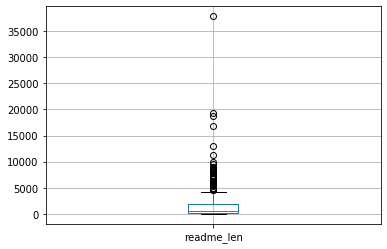

In [101]:
import matplotlib.pyplot as plt
json_chk[['language','readme_len']].boxplot()
plt.show